In [1]:
import numpy as np
import cv2
from os import listdir
from PIL import Image
from matplotlib import pyplot as plt
from ImageProcessor import Split

In [2]:
wd = 'C:/Users/tmyda/Documents/UAV_reg/Reg'
name = listdir(wd)
train_x = []
train_y = []

for n in name[:]:
    path = 'C:/Users/tmyda/Documents/UAV_reg/Reg/{name}/IMG_{name}_4toIMG_{name}_2_registered.tif'.format(name=n)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    imgSet  = Split(img/255, 320)
    for item in imgSet:
        train_x.append(item)
    
    path = 'C:/Users/tmyda/Documents/UAV_reg/Reg/{name}/IMG_{name}_2.tif'.format(name=n)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    imgSet  = Split(img/255, 320)
    for item in imgSet:
        train_y.append(item)
    
train_x = np.stack(train_x, axis=0)
train_y = np.stack(train_y, axis=0)
train_x = np.expand_dims(train_x, axis=-1)
train_y = np.expand_dims(train_y, axis=-1)

print('X.shape')
print(train_x.shape)
print('Y.shape')
print(train_y.shape)

np.save('C:/Users/tmyda/Documents/UAV_reg/Splitted_training_data/train_x', train_x)
np.save('C:/Users/tmyda/Documents/UAV_reg/Splitted_training_data/train_y', train_y)

X.shape
(1644, 320, 320, 1)
Y.shape
(1644, 320, 320, 1)


In [12]:
index = 22
np.max(train_x[index, :, :, 0])

0.8549019607843137

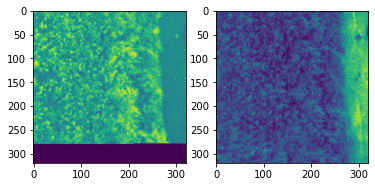

In [13]:
plt.subplot(121)

plt.imshow(train_x[index, :, :, 0])
plt.subplot(122)
plt.imshow(train_y[index, :, :, 0])